<a href="https://colab.research.google.com/github/esinghbe23-ctrl/Topsis_Pretrained_Model/blob/main/Topsis_Pretrained_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
import numpy as np
df = pd.read_csv("Text_Summarization.csv")
print(df)

Saving Text_Summarization.csv to Text_Summarization (10).csv
   Text domain Text models    P1     P2     P3     P4     P5    P6
0     Politics   T1     M1  7.83  10.98  -9.58  -4.12   1.73  6.37
1          NaN  NaN     M2 -1.01   3.62   7.06   2.92   4.69  6.74
2          NaN  NaN     M3  2.40  10.91  -4.62  -6.66   3.67 -8.05
3          NaN  NaN     M4  8.74   0.97  -2.14  -9.91   2.27 -9.55
4          NaN   T2     M1  5.49  -2.34   9.98   6.68  -6.68  2.09
5          NaN  NaN     M2  8.90   0.29   1.20   5.67  -0.01 -7.58
6          NaN  NaN     M3  8.69   0.95  10.41   6.58  -8.71 -4.57
7          NaN  NaN     M4 -7.39  -5.99  -0.25   4.93   9.74  8.31
8          NaN   T3     M1  0.96  -9.29  -6.55  -6.21   4.06  0.17
9          NaN  NaN     M2  4.44  -6.32   4.55  -6.16  -2.61 -0.46
10         NaN  NaN     M3 -9.61  -2.23   9.53  -8.54   5.45 -5.93
11         NaN  NaN     M4  9.37   2.50  -0.85  -6.13   5.23  3.42
12         NaN   T4     M1  2.93  -2.78  -2.97  -1.54  -4.47  6.14
1

In [53]:
df = df.dropna(how="all")
df["Text domain"] = df["Text domain"].ffill()
df["Text"] = df["Text"].ffill()
df.reset_index(drop=True, inplace=True)
df

,Text domain,Text,models,P1,P2,P3,P4,P5,P6
0,Politics,T1,M1,7.83,10.98,-9.58,-4.12,1.73,6.37
1,Politics,T1,M2,-1.01,3.62,7.06,2.92,4.69,6.74
2,Politics,T1,M3,2.40,10.91,-4.62,-6.66,3.67,-8.05
3,Politics,T1,M4,8.74,0.97,-2.14,-9.91,2.27,-9.55
4,Politics,T2,M1,5.49,-2.34,9.98,6.68,-6.68,2.09
5,Politics,T2,M2,8.90,0.29,1.20,5.67,-0.01,-7.58
6,Politics,T2,M3,8.69,0.95,10.41,6.58,-8.71,-4.57
7,Politics,T2,M4,-7.39,-5.99,-0.25,4.93,9.74,8.31
8,Politics,T3,M1,0.96,-9.29,-6.55,-6.21,4.06,0.17
9,Politics,T3,M2,4.44,-6.32,4.55,-6.16,-2.61,-0.46


In [54]:
def topsis(matrix, weights, impacts):
    norm_matrix = matrix / np.sqrt((matrix**2).sum())
    weighted_matrix = norm_matrix * weights

    ideal_best = []
    ideal_worst = []

    for i, impact in enumerate(impacts):
        if impact == '+':
            ideal_best.append(weighted_matrix.iloc[:, i].max())
            ideal_worst.append(weighted_matrix.iloc[:, i].min())
        else:
            ideal_best.append(weighted_matrix.iloc[:, i].min())
            ideal_worst.append(weighted_matrix.iloc[:, i].max())

    ideal_best = np.array(ideal_best)
    ideal_worst = np.array(ideal_worst)

    dist_best = np.sqrt(((weighted_matrix - ideal_best)**2).sum(axis=1))
    dist_worst = np.sqrt(((weighted_matrix - ideal_worst)**2).sum(axis=1))

    return dist_worst / (dist_best + dist_worst)

In [56]:
criteria = ["P1", "P2", "P3", "P4", "P5", "P6"]

weights = np.array([1/6]*6)     # Equal weights
impacts = ['+','+','+','+','+','+']


In [57]:
df["TOPSIS Score"] = 0.0
df["Rank"] = 0

for text, group in df.groupby("Text"):
    scores = topsis(group[criteria].astype(float), weights, impacts)
    df.loc[group.index, "TOPSIS Score"] = scores
    df.loc[group.index, "Rank"] = scores.rank(ascending=False, method="dense")

In [58]:
df_sorted = df.sort_values(["Text", "Rank"])
df_sorted[["Text domain", "Text", "models", "TOPSIS Score", "Rank"]]

,Text domain,Text,models,TOPSIS Score,Rank
1,Politics,T1,M2,0.680594,1
0,Politics,T1,M1,0.501610,2
3,Politics,T1,M4,0.361267,3
2,Politics,T1,M3,0.354694,4
4,Politics,T2,M1,0.522148,1
7,Politics,T2,M4,0.517991,2
6,Politics,T2,M3,0.507450,3
5,Politics,T2,M2,0.493784,4
11,Politics,T3,M4,0.740619,1
9,Politics,T3,M2,0.529785,2


In [59]:
best_per_text = df_sorted[df_sorted["Rank"] == 1]
best_per_text[["Text", "models", "TOPSIS Score"]]

,Text,models,TOPSIS Score
1,T1,M2,0.680594
4,T2,M1,0.522148
11,T3,M4,0.740619
14,T4,M3,0.694712
18,T5,M3,0.640387


In [60]:
best_per_text = df[df["Rank"] == 1]

win_count = (
    best_per_text["models"]
    .value_counts()
    .reset_index()
    .rename(columns={"index": "Model", "models": "Wins"})
)

win_count

,Wins,count
0,M3,2
1,M2,1
2,M1,1
3,M4,1


In [61]:
avg_score = (
    df.groupby("models")["TOPSIS Score"]
    .mean()
    .reset_index()
    .rename(columns={"TOPSIS Score": "Avg_TOPSIS"})
)

avg_score

,models,Avg_TOPSIS
0,M1,0.438673
1,M2,0.491912
2,M3,0.531875
3,M4,0.503765


In [66]:
print(win_count.columns)
print(avg_score.columns)

Index(['Wins', 'count'], dtype='object')
Index(['models', 'Avg_TOPSIS'], dtype='object')


In [72]:
avg_score = avg_score.rename(columns={"models": "Model"})

In [74]:
win_count.columns = ["Model", "Wins"]


In [75]:
avg_score.columns = ["Model", "Avg_TOPSIS"]

In [76]:
final_selection = pd.merge(win_count, avg_score, on="Model", how="inner")
final_selection

,Model,Wins,Avg_TOPSIS
0,M3,2,0.531875
1,M2,1,0.491912
2,M1,1,0.438673
3,M4,1,0.503765


In [77]:
final_selection = final_selection.sort_values(
    by=["Wins", "Avg_TOPSIS"],
    ascending=[False, False]
)

best_model = final_selection.iloc[0]

print("🏆 FINAL BEST TEXT SUMMARIZATION MODEL 🏆")
print("Model:", best_model["Model"])
print("Rank-1 Wins:", best_model["Wins"])
print("Average TOPSIS Score:", round(best_model["Avg_TOPSIS"], 4))

🏆 FINAL BEST TEXT SUMMARIZATION MODEL 🏆
Model: M3
Rank-1 Wins: 2
Average TOPSIS Score: 0.5319


/tmp/ipython-input-2704635094.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


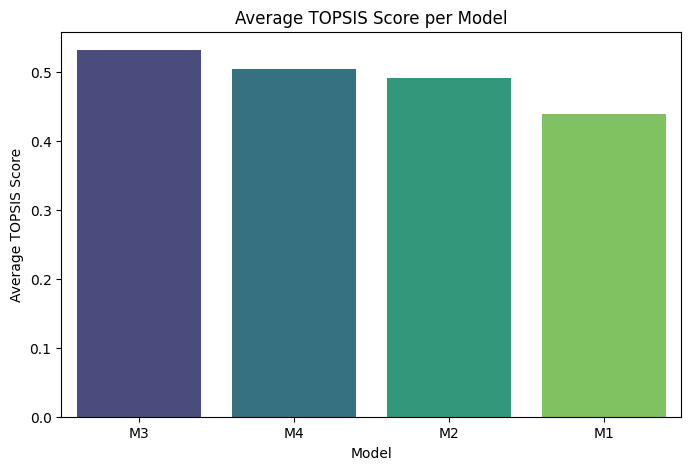

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(
    data=final_selection,
    x="Model",
    y="Avg_TOPSIS",
    palette="viridis"
)

plt.title("Average TOPSIS Score per Model")
plt.ylabel("Average TOPSIS Score")
plt.xlabel("Model")
plt.show()

/tmp/ipython-input-1266941511.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


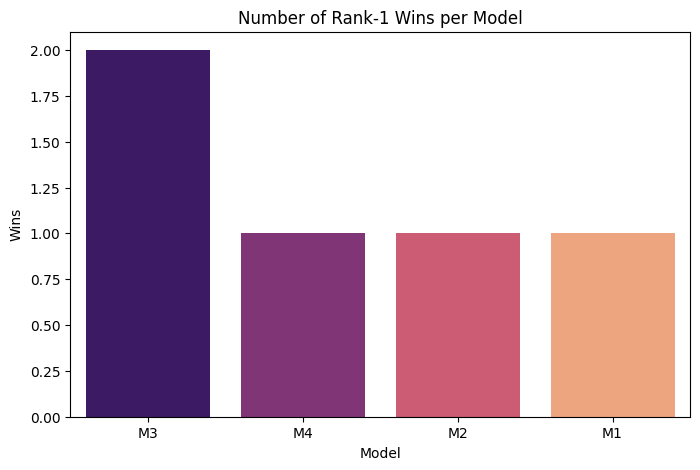

In [79]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=final_selection,
    x="Model",
    y="Wins",
    palette="magma"
)

plt.title("Number of Rank-1 Wins per Model")
plt.ylabel("Wins")
plt.xlabel("Model")
plt.show()

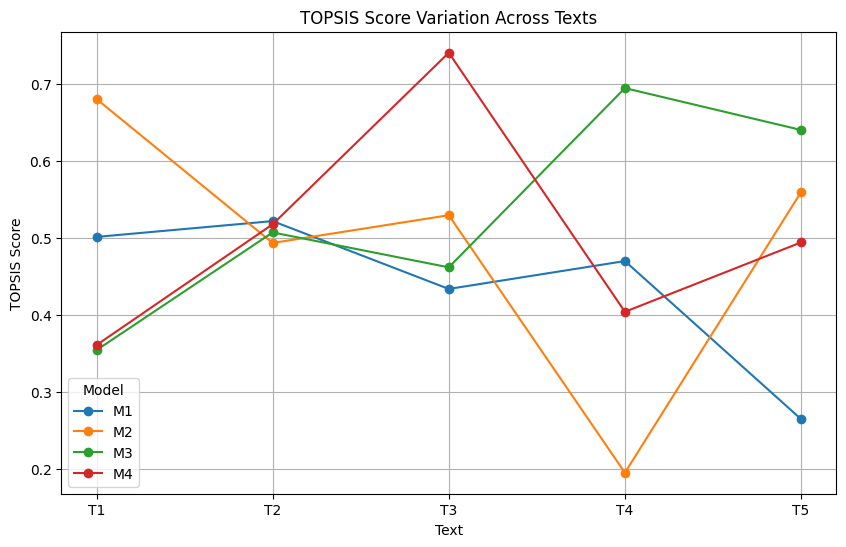

In [80]:
plt.figure(figsize=(10,6))

for model in df["models"].unique():
    subset = df[df["models"] == model]
    plt.plot(
        subset["Text"],
        subset["TOPSIS Score"],
        marker="o",
        label=model
    )

plt.title("TOPSIS Score Variation Across Texts")
plt.xlabel("Text")
plt.ylabel("TOPSIS Score")
plt.legend(title="Model")
plt.grid(True)
plt.show()

/tmp/ipython-input-1488316330.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


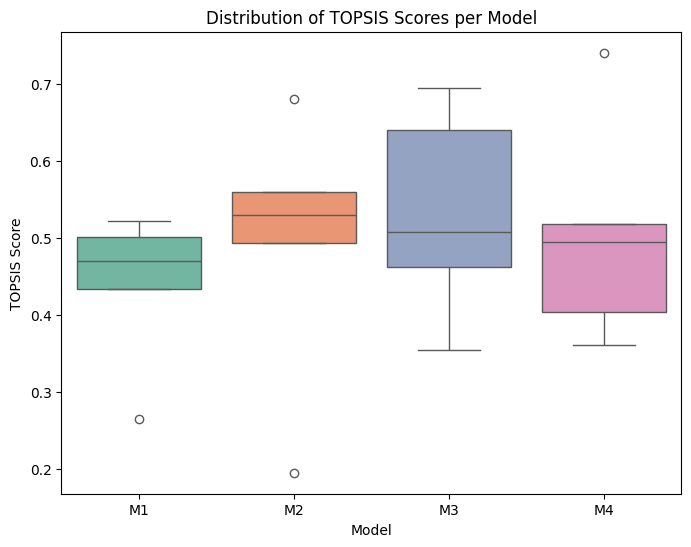

In [81]:
plt.figure(figsize=(8,6))
sns.boxplot(
    data=df,
    x="models",
    y="TOPSIS Score",
    palette="Set2"
)

plt.title("Distribution of TOPSIS Scores per Model")
plt.xlabel("Model")
plt.ylabel("TOPSIS Score")
plt.show()

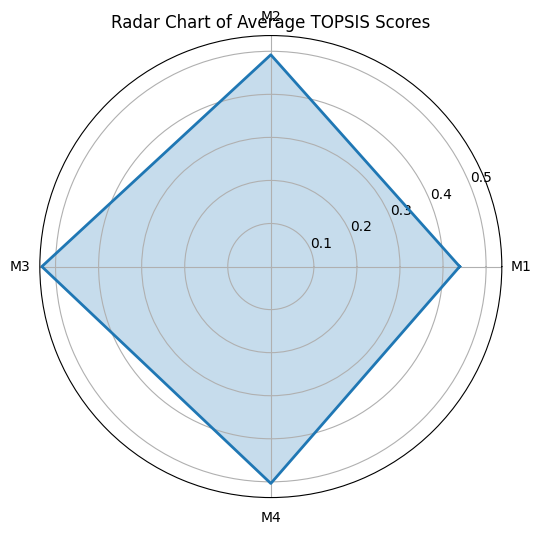

In [82]:
from math import pi

avg_scores = df.groupby("models")["TOPSIS Score"].mean()

labels = avg_scores.index
values = avg_scores.values.tolist()
values += values[:1]

angles = [n / float(len(labels)) * 2 * pi for n in range(len(labels))]
angles += angles[:1]

plt.figure(figsize=(6,6))
ax = plt.subplot(111, polar=True)

ax.plot(angles, values, linewidth=2)
ax.fill(angles, values, alpha=0.25)

ax.set_thetagrids([a * 180/pi for a in angles[:-1]], labels)
plt.title("Radar Chart of Average TOPSIS Scores")
plt.show()